<a href="https://colab.research.google.com/github/anggad08/DMC_ML_COURSE/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribución de las clases antes de SMOTE:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Distribución de las clases después de SMOTE:
quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64
Epoch 1/100
385/385 [==============================] - 5s 5ms/step - loss: 3.3221 - accuracy: 0.3201 - val_loss: 2.5519 - val_accuracy: 0.5221
Epoch 2/100
385/385 [==============================] - 2s 4ms/step - loss: 2.3535 - accuracy: 0.4680 - val_loss: 1.8638 - val_accuracy: 0.5734
Epoch 3/100
385/385 [==============================] - 2s 4ms/step - loss: 1.8157 - accuracy: 0.5165 - val_loss: 1.4794 - val_accuracy: 0.5991
Epoch 4/100
385/385 [==============================] - 2s 4ms/step - loss: 1.5022 - accuracy: 0.5479 - val_loss: 1.2402 - val_accuracy: 0.6306
Epoch 5/100
385/385 [==============================] - 3s 7ms/step - loss: 1.3375 - accuracy: 0.5702 - val_loss: 1.1317 - val_accura

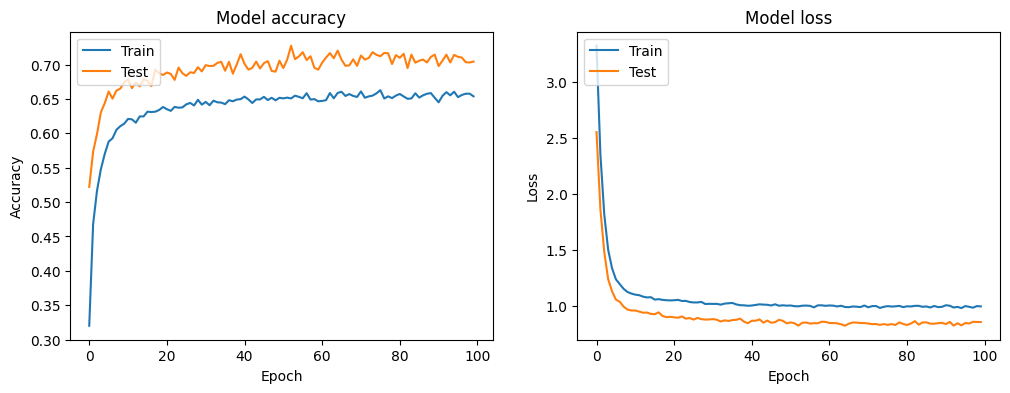

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir el objetivo a categorías
y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

# Paso 4: Construir el modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Ajuste del Dropout

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  # Capa adicional
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(y_train_cat.shape[1], activation='softmax', kernel_regularizer=l2(0.01)))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat), verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Visualización de los resultados

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Distribución de las clases antes de SMOTE:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Distribución de las clases después de SMOTE:
quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64
Epoch 1/100
385/385 [==============================] - 6s 8ms/step - loss: 3.3656 - accuracy: 0.3138 - val_loss: 2.5872 - val_accuracy: 0.4977
Epoch 2/100
385/385 [==============================] - 2s 4ms/step - loss: 2.3978 - accuracy: 0.4447 - val_loss: 1.9403 - val_accuracy: 0.5471
Epoch 3/100
385/385 [==============================] - 2s 5ms/step - loss: 1.8651 - accuracy: 0.5015 - val_loss: 1.5511 - val_accuracy: 0.5793
Epoch 4/100
385/385 [==============================] - 2s 5ms/step - loss: 1.5499 - accuracy: 0.5362 - val_loss: 1.2732 - val_accuracy: 0.6309
Epoch 5/100
385/385 [==============================] - 2s 5ms/step - loss: 1.3616 - accuracy: 0.5685 - val_loss: 1.1548 - val_accura

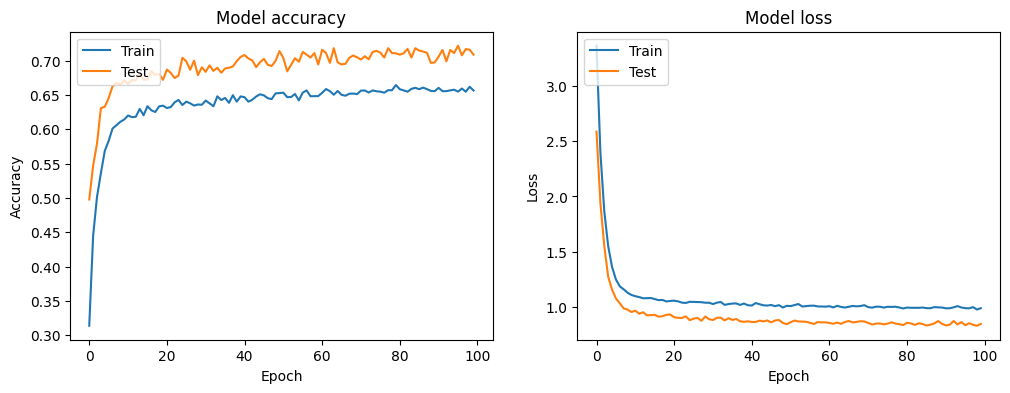

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir el objetivo a categorías
y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

# Paso 4: Construir el modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Ajuste del Dropout

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  # Capa adicional
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(y_train_cat.shape[1], activation='softmax', kernel_regularizer=l2(0.01)))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat), verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Visualización de los resultados

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Distribución de las clases antes de SMOTE:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Distribución de las clases después de SMOTE:
quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64
Epoch 1/100
385/385 [==============================] - 6s 9ms/step - loss: 2.3882 - accuracy: 0.2799 - val_loss: 1.7931 - val_accuracy: 0.4477
Epoch 2/100
385/385 [==============================] - 3s 7ms/step - loss: 1.9181 - accuracy: 0.4110 - val_loss: 1.5504 - val_accuracy: 0.5270
Epoch 3/100
385/385 [==============================] - 2s 5ms/step - loss: 1.7619 - accuracy: 0.4567 - val_loss: 1.4581 - val_accuracy: 0.5715
Epoch 4/100
385/385 [==============================] - 2s 5ms/step - loss: 1.6708 - accuracy: 0.4852 - val_loss: 1.3954 - val_accuracy: 0.5975
Epoch 5/100
385/385 [==============================] - 2s 6ms/step - loss: 1.5824 - accuracy: 0.5138 - val_loss: 1.3449 - val_accura

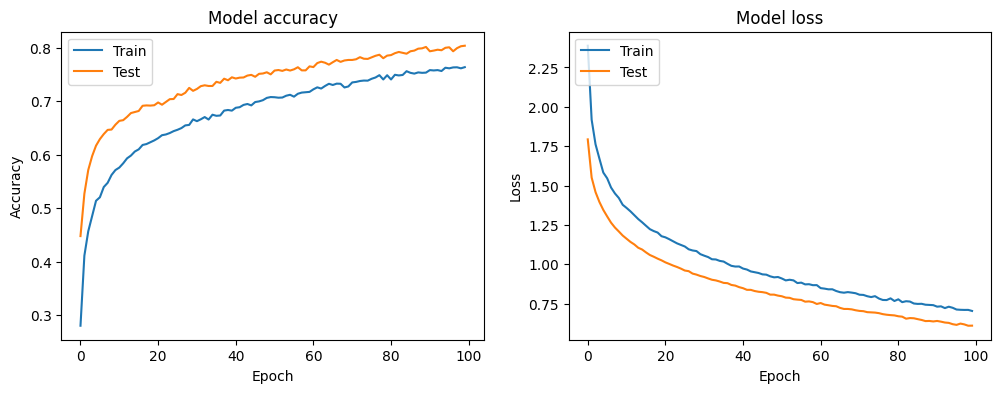

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir el objetivo a categorías
y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

# Paso 4: Construir el modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))  # Aumentar las neuronas y reducir regularización
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Reducir Dropout

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=0.0001)  # Reducir la tasa de aprendizaje
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat),
                    verbose=1, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Visualización de los resultados

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Escalar los datos
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convertir el objetivo a categorías
y_resampled_cat = to_categorical(y_resampled - y_resampled.min())

# Paso 4: Definir el modelo de red neuronal mejorado
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_resampled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(y_resampled_cat.shape[1], activation='softmax'))

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Usar KerasClassifier para la validación cruzada
model_cv = KerasClassifier(model=create_model, epochs=100, batch_size=32, verbose=0)

# Definir validación cruzada con 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Aplicar cross-validation
scores = cross_val_score(model_cv, X_resampled, y_resampled, cv=kfold)

# Imprimir la precisión promedio
print(f"Precisión promedio de cross-validation: {scores.mean():.4f}")


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat), verbose=1, callbacks=[early_stopping])


Epoch 1/100
385/385 [==============================] - 2s 5ms/step - loss: 0.9949 - accuracy: 0.6562 - val_loss: 0.8547 - val_accuracy: 0.7063
Epoch 2/100
385/385 [==============================] - 2s 4ms/step - loss: 0.9889 - accuracy: 0.6567 - val_loss: 0.8496 - val_accuracy: 0.7008
Epoch 3/100
385/385 [==============================] - 2s 5ms/step - loss: 0.9914 - accuracy: 0.6590 - val_loss: 0.8194 - val_accuracy: 0.7225
Epoch 4/100
385/385 [==============================] - 3s 8ms/step - loss: 0.9870 - accuracy: 0.6527 - val_loss: 0.8454 - val_accuracy: 0.7011
Epoch 5/100
385/385 [==============================] - 3s 8ms/step - loss: 0.9920 - accuracy: 0.6570 - val_loss: 0.8423 - val_accuracy: 0.7173
Epoch 6/100
385/385 [==============================] - 2s 5ms/step - loss: 0.9946 - accuracy: 0.6569 - val_loss: 0.8560 - val_accuracy: 0.6923
Epoch 7/100
385/385 [==============================] - 2s 4ms/step - loss: 0.9830 - accuracy: 0.6586 - val_loss: 0.8298 - val_accuracy: 0.7060

In [ ]:
!pip install scikeras

Distribución de las clases antes de SMOTE:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Distribución de las clases después de SMOTE:
quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2228 - loss: 2.5955 - val_accuracy: 0.4581 - val_loss: 1.8157
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3860 - loss: 1.9789 - val_accuracy: 0.5429 - val_loss: 1.5334
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4456 - loss: 1.7718 - val_accuracy: 0.5763 - val_loss: 1.4391
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4770 - loss: 1.6799 - val_accuracy: 0.5913 - val_loss: 1.3733
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5115 - loss: 1.5705 - val_accuracy: 0.6046 - val_loss: 1.3266
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5212 - loss: 1.5112 - val_accuracy: 0.6183 - val_loss: 1.2873
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5378 - loss: 1.4861 - val_accuracy: 0.6235 - val_loss: 1.2572
Epoch 8/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5496 - loss: 1.4377 - val_acc

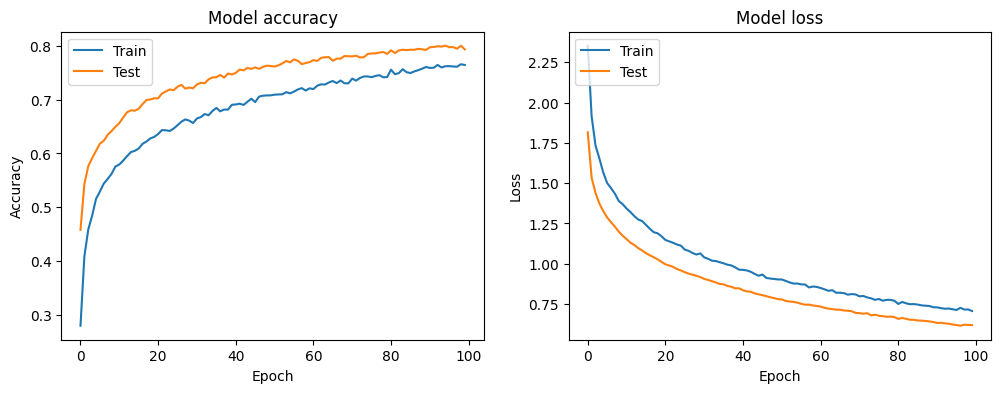

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir el objetivo a categorías
y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

# Paso 4: Construir el modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))  # Aumentar las neuronas y reducir regularización
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Reducir Dropout

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=0.0001)  # Reducir la tasa de aprendizaje
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat),
                    verbose=1, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Visualización de los resultados

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
pip uninstall scikit-learn imbalanced-learn


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.5.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.5.1
Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.12.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? y
  Successfully uninstalled imbalanced-learn-0.12.3


In [ ]:
pip install scikit-learn==1.0.2 imbalanced-learn==0.8.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Distribución de las clases antes de SMOTE:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Distribución de las clases después de SMOTE:
quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2059 - loss: 2.7319 - val_accuracy: 0.4146 - val_loss: 1.8856
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3500 - loss: 2.1592 - val_accuracy: 0.5133 - val_loss: 1.6384
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3997 - loss: 1.9765 - val_accuracy: 0.5439 - val_loss: 1.5502
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4296 - loss: 1.8616 - val_accuracy: 0.5679 - val_loss: 1.4839
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4450 - loss: 1.7956 - val_accuracy: 0.5822 - val_loss: 1.4369
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4656 - loss: 1.7264 - val_accuracy: 0.5890 - val_loss: 1.4024
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4854 - loss: 1.6499 - val_accuracy: 0.6001 - val_loss: 1.3664
Epoch 8/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4838 - loss: 1.6461 - val_acc

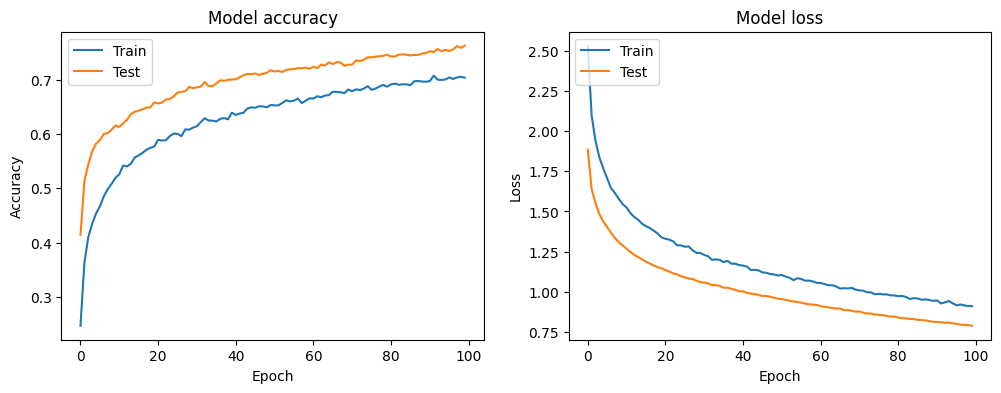

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset original
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Separar las características (X) y el objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Verificar la distribución de las clases antes de SMOTE
print("Distribución de las clases antes de SMOTE:")
print(y.value_counts())

# Paso 2: Aplicar SMOTE con menos vecinos
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:")
print(y_resampled.value_counts())

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir el objetivo a categorías
y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

# Paso 4: Construir el modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compilar el modelo con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=0.00005)  # Tasa de aprendizaje más baja
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test, y_test_cat),
                    verbose=1, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Visualización de los resultados

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/20
782/782 [==============================] - 89s 111ms/step - loss: 1.5849 - accuracy: 0.4375 - val_loss: 1.2860 - val_accuracy: 0.5443
Epoch 2/20
782/782 [==============================] - 88s 113ms/step - loss: 1.1921 - accuracy: 0.5810 - val_loss: 1.2838 - val_accuracy: 0.5421
Epoch 3/20
782/782 [==============================] - 87s 111ms/step - loss: 1.0208 - accuracy: 0.6444 - val_loss: 1.1214 - val_accuracy: 0.6089
Epoch 4/20
782/782 [==============================] - 87s 112ms/step - loss: 0.9096 - accuracy: 0.6818 - val_loss: 1.3046 - val_accuracy: 0.5808
Epoch 5/20
782/782 [==============================] - 87s 111ms/step - loss: 0.8362 - accuracy: 0.7092 - val_loss: 0.9161 - val_accuracy: 0.6913
Epoch 6/20
782/782 [==============================] - 87s 111ms/step - loss: 0.7633 - accuracy: 0.7335 - val_loss: 0.8790 - val_accuracy: 0.7042
Epoch 7/20
782/782 [==============================] - 90s 115ms

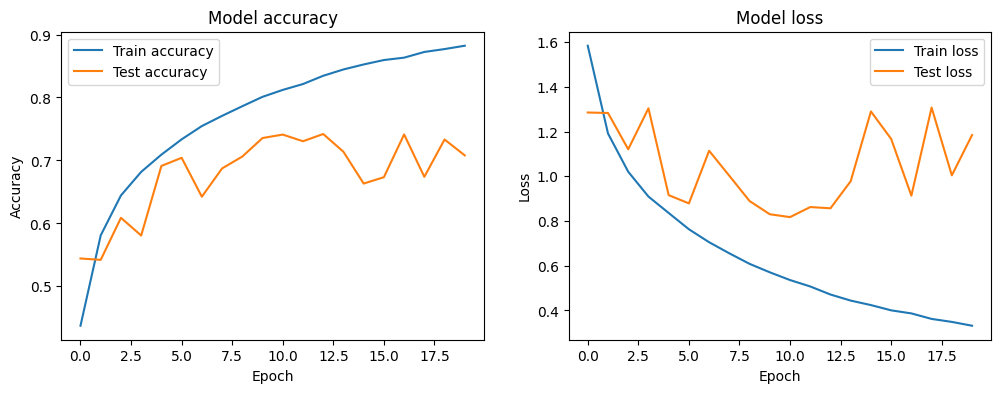

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
# Normalizar las imágenes a valores entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa (Fully Connected) con 128 neuronas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout para prevenir sobreajuste

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1)

# Paso 6: Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Paso 7: Graficar los resultados
plt.figure(figsize=(12, 4))

# Gráfico de precisión (accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/50
782/782 [==============================] - 97s 118ms/step - loss: 3.1464 - accuracy: 0.1457 - val_loss: 3.0027 - val_accuracy: 0.1822
Epoch 2/50
782/782 [==============================] - 95s 122ms/step - loss: 2.4937 - accuracy: 0.1927 - val_loss: 2.7439 - val_accuracy: 0.2399
Epoch 3/50
782/782 [==============================] - 94s 120ms/step - loss: 2.3446 - accuracy: 0.2385 - val_loss: 2.6756 - val_accuracy: 0.2846
Epoch 4/50
782/782 [==============================] - 93s 119ms/step - loss: 2.2275 - accuracy: 0.2763 - val_loss: 2.6895 - val_accuracy: 0.3043
Epoch 5/50
782/782 [==============================] - 95s 122ms/step - loss: 2.1257 - accuracy: 0.3133 - val_loss: 2.9881 - val_accuracy: 0.2927
Epoch 6/50
782/782 [==============================] - 94s 120ms/step - loss: 2.0419 - accuracy: 0.3465 - val_loss: 3.0549 - val_accuracy: 0.3054
Epoch 7/50
782/782 [==============================] - 94s 120ms/step - loss: 1.9774 - accuracy: 0.3708 - val_loss: 3.4588 - val_ac

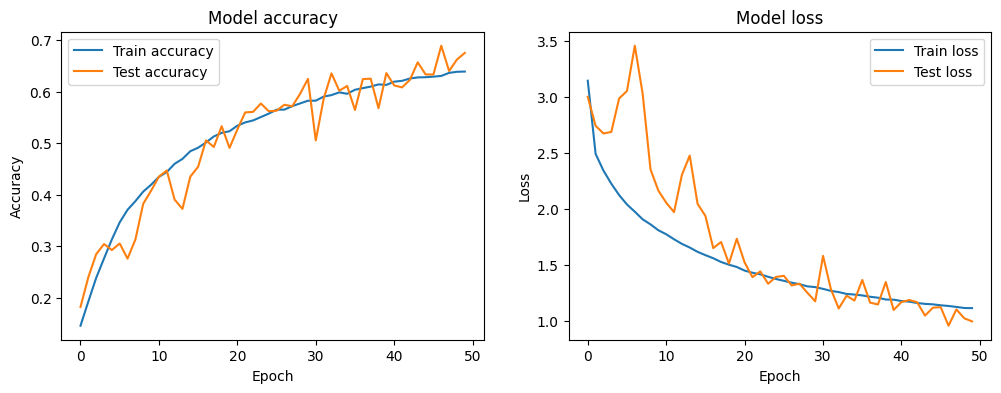

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN con dropout y regularización L2
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional 2 con regularización L2 y dropout
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional 3 con regularización L2 y dropout
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje ajustada
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 6: Entrenar el modelo con Early Stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa convolucional 2 con regularización L2 y dropout
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa convolucional 3 con regularización L2 y dropout
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Aumentamos una capa convolucional adicional
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Dropout aumentado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00005),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 6: Entrenar el modelo con más épocas y early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/100


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 2 for '{{node sequential_1_1/conv2d_6_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1_1/dropout_6_1/stateless_dropout/SelectV2, sequential_1_1/conv2d_6_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,256], [3,3,256,512].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 256), dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa convolucional 2 con regularización L2 y dropout
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa convolucional 3 con regularización L2 y dropout
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Aumentamos una capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))  # Dropout aumentado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))  # Aumentar Dropout

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00005),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 6: Entrenar el modelo con más épocas y early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Exception ignored in: <function _xla_gc_callback at 0x79d4de74c3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


KeyboardInterrupt: 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.1271 - loss: 4.3955 - val_accuracy: 0.2160 - val_loss: 3.7758
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.1743 - loss: 2.7923 - val_accuracy: 0.2331 - val_loss: 3.8679
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2274 - loss: 2.6532 - val_accuracy: 0.2610 - val_loss: 3.8084
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2624 - loss: 2.5434 - val_accuracy: 0.3012 - val_loss: 3.4664
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2950 - loss: 2.4400 - val_accuracy: 0.3434 - val_loss: 3.1265
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3245 - loss: 2.3461 - val_accuracy: 0.3654 - val_loss: 3.0349
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3552 - loss: 2.2571 - val_accuracy: 0.3818 - val_loss: 2.9273
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3828 - loss: 2.1747 - val_accuracy:

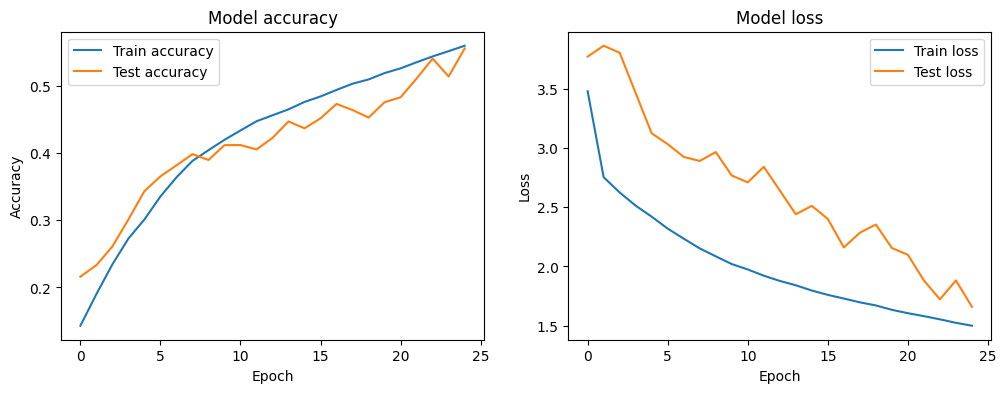

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN con ajustes para acelerar
model = Sequential()

# Capa convolucional 1 con menos filtros para acelerar
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Reducir Dropout para acelerar

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Reducir Dropout

# Capa convolucional 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con menos neuronas para acelerar
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00005),  # Mantener la tasa de aprendizaje baja para entrenar con precisión
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Paso 6: Entrenar el modelo con menos épocas
history = model.fit(X_train, y_train, epochs=25, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.1259 - loss: 4.5315 - val_accuracy: 0.1068 - val_loss: 4.9682
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1722 - loss: 2.8440 - val_accuracy: 0.2420 - val_loss: 3.7775
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1996 - loss: 2.7326 - val_accuracy: 0.2618 - val_loss: 3.7878
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2293 - loss: 2.6478 - val_accuracy: 0.2765 - val_loss: 3.8839
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2582 - loss: 2.5740 - val_accuracy: 0.3039 - val_loss: 3.7217
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2906 - loss: 2.4832 - val_accuracy: 0.3264 - val_loss: 3.6580
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3208 - loss: 2.4036 - val_accuracy: 0.3347 - val_loss: 3.7333
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3330 - loss: 2.3480 - val_accuracy: 

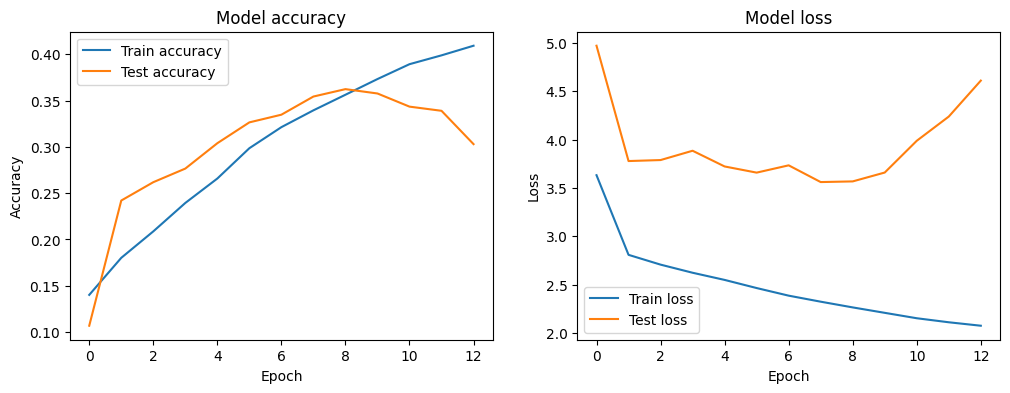

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN con ajustes para evitar dimensiones negativas
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Capa de salida con 10 neuronas
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Paso 6: Entrenar el modelo con 50 épocas
history = model.fit(X_train, y_train, epochs=50, batch_size=128,  # Aquí cambiamos a 50 épocas
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.1750 - loss: 4.5998 - val_accuracy: 0.1613 - val_loss: 5.1802
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.2893 - loss: 3.4663 - val_accuracy: 0.2683 - val_loss: 4.0707
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3618 - loss: 3.2322 - val_accuracy: 0.2859 - val_loss: 4.2449
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3988 - loss: 3.0816 - val_accuracy: 0.2755 - val_loss: 4.3845
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4309 - loss: 2.9373 - val_accuracy: 0.2586 - val_loss: 4.8102
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4552 - loss: 2.8116 - val_accuracy: 0.3085 - val_loss: 4.1980
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4789 - loss: 2.6829 - val_accuracy: 0.3409 - val_loss: 3.9169
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5024 - loss: 2.5638 - val_

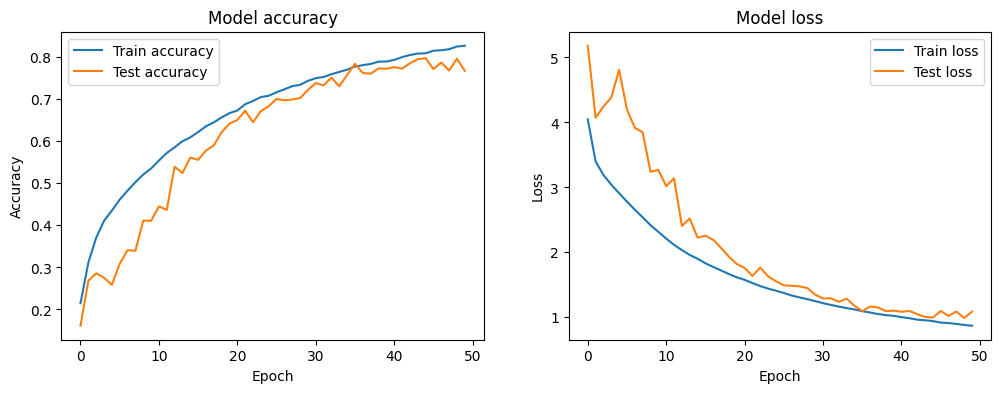

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))  # Ajustar Dropout

# Capa convolucional 2 con regularización L2 y dropout
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional 3 con regularización L2 y dropout
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout aumentado

# Nota: Eliminamos la última capa de MaxPooling para evitar la reducción excesiva de las dimensiones.

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Ajustar Dropout

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.00005),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 6: Entrenar el modelo con más épocas y early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Reduce el learning rate exponencialmente después de 30 épocas

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.2558 - loss: 5.4136 - val_accuracy: 0.2522 - val_loss: 5.7617 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.4286 - loss: 4.3450 - val_accuracy: 0.3442 - val_loss: 5.1813 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4898 - loss: 3.7921 - val_accuracy: 0.4200 - val_loss: 4.3028 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5490 - loss: 3.2744 - val_accuracy: 0.3843 - val_loss: 4.3892 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5842 - loss: 2.8529 - val_accuracy: 0.5649 - val_loss: 2.9376 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6233 - loss: 2.5113 - val_accuracy: 0.6289 - val_loss: 2.4409 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step 

ValueError: The output of the `schedule` function should be a float. Got: 9.048373613040894e-05

Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.2617 - loss: 5.3944 - val_accuracy: 0.3465 - val_loss: 4.9847 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4319 - loss: 4.3267 - val_accuracy: 0.3581 - val_loss: 5.0660 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4922 - loss: 3.7822 - val_accuracy: 0.4478 - val_loss: 4.0250 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5438 - loss: 3.2777 - val_accuracy: 0.5094 - val_loss: 3.4437 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5865 - loss: 2.8501 - val_accuracy: 0.5559 - val_loss: 3.0342 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6260 - loss: 2.4922 - val_accuracy: 0.6418 - val_loss: 2.4036 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step -

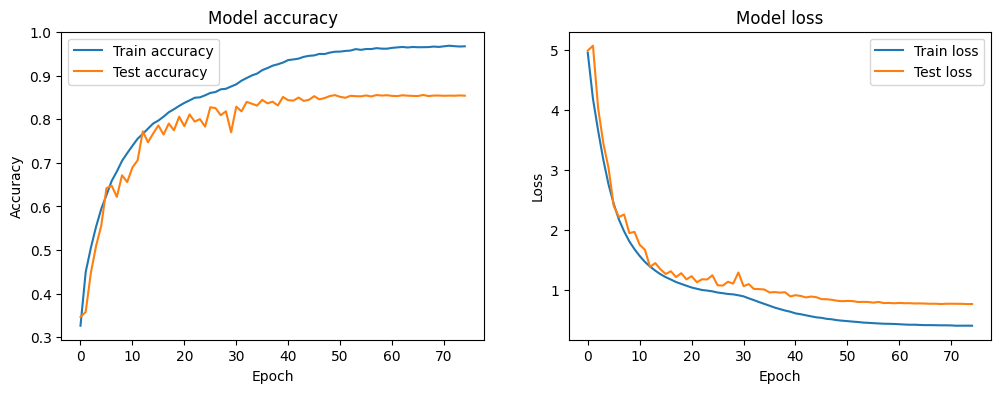

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Aseguramos que se devuelve como float
    else:
        return float(lr * tf.math.exp(-0.1))  # Reduce el learning rate exponencialmente después de 30 épocas y se devuelve como float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import pickle  # Para guardar el historial de entrenamiento

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Aseguramos que se devuelve como float
    else:
        return float(lr * tf.math.exp(-0.1))  # Reduce el learning rate exponencialmente después de 30 épocas y se devuelve como float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Guardar el modelo al final del entrenamiento
model.save('CNN-MODELO.h5')  # Esto guarda el modelo completo

# Guardar el historial de entrenamiento en un archivo pickle
with open('training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# Paso 8: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 817s 1s/step - accuracy: 0.2662 - loss: 5.3821 - val_accuracy: 0.3457 - val_loss: 5.4451 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 777s 986ms/step - accuracy: 0.4321 - loss: 4.3415 - val_accuracy: 0.3727 - val_loss: 4.8374 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 708s 866ms/step - accuracy: 0.4985 - loss: 3.8015 - val_accuracy: 0.4188 - val_loss: 4.3743 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 709s 900ms/step - accuracy: 0.5452 - loss: 3.3162 - val_accuracy: 0.5478 - val_loss: 3.2908 - learning_rate: 1.0000e-04
Epoch 5/75
646/782 ━━━━━━━━━━━━━━━━━━━━ 1:49 806ms/step - accuracy: 0.5881 - loss: 2.9041

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Crea la carpeta .kaggle y mueve el archivo kaggle.json allí
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Cambia los permisos del archivo para que sea privado
!chmod 600 ~/.kaggle/kaggle.json

# Verifica que todo esté correcto mostrando la lista de datasets de Kaggle
!kaggle datasets list


ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2560         35  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          10632        231  0.9411765        
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           3670         84  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [ ]:
model.save('CNN-MODELO.h5')


NameError: name 'model' is not defined

In [ ]:
!kaggle datasets download -d kanchana1990/bacteria-dataset



Dataset URL: https://www.kaggle.com/datasets/kanchana1990/bacteria-dataset
License(s): ODC Attribution License (ODC-By)
  0% 0.00/4.06k [00:00<?, ?B/s]
100% 4.06k/4.06k [00:00<00:00, 9.49MB/s]


In [ ]:
!unzip bacteria-dataset.zip


Archive:  bacteria-dataset.zip
  inflating: bacteria_list_200.csv   


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import os

# Paso 1: Configurar el directorio del dataset de bacterias
train_dir = '/path/to/train'  # Cambia esta ruta a la carpeta donde se descomprimieron las imágenes de entrenamiento
test_dir = '/path/to/test'    # Cambia esta ruta a la carpeta donde se descomprimieron las imágenes de prueba

# Paso 2: Data Augmentation para ampliar los datos de entrenamiento
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,  # Normalizar las imágenes
    validation_split=0.2  # Reservar un 20% para validación
)

# Cargar los datos de entrenamiento con data augmentation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Ajusta el tamaño según tus necesidades
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

# Cargar los datos de validación
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Ajusta el tamaño según tus necesidades
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Cargar los datos de prueba sin data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Ajusta el tamaño según tus necesidades
    batch_size=64,
    class_mode='categorical'
)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002), input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Ajustar el número de clases dinámicamente

# Paso 4: Compilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 6: Entrenar el modelo con data augmentation
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

# Paso 7: Guardar el modelo
model.save('Bacteria-CNN-Model.h5')

# Paso 8: Evaluar el modelo
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/train'

In [ ]:
train_dir = '/content/bacteria_dataset/train'  # Ruta del dataset de entrenamiento
test_dir = '/content/bacteria_dataset/test'    # Ruta del dataset de prueba

In [ ]:
!ls /content/bacteria_data


ls: cannot access '/content/bacteria_data': No such file or directory


In [ ]:
!ls /content/bacteria_list_200.csv


/content/bacteria_list_200.csv


In [ ]:
import zipfile
import os

# Define la ruta del archivo zip
zip_path = '/content/bacteria-dataset.zip'

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/bacteria_data')

# Verifica el contenido extraído
!ls /content/bacteria_data


bacteria_list_200.csv


In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection


403 - Forbidden - You must accept this competition's rules before you'll be able to download files.
